In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [71]:
# create two linearly separable two dimensional datasets. I want to implement perceptron learning algorithm to classify them.

# dataset 1
np.random.seed(0)

mean1 = [0, 0]
cov1 = [[1, -1], [-4, 3]]  # diagonal covariance, points are elongated along the y-axis
X1 = np.random.multivariate_normal(mean1, cov1, 100)
y1 = np.ones(100)

# data 2
mean2 = [5, 5]
cov2 = [[-2, 2], [1, -3]]  # diagonal covariance, points are elongated along the y-axis
X2 = np.random.multivariate_normal(mean2, cov2, 100)
y2 = -np.ones(100)

C:\Users\matip\AppData\Local\Temp\ipykernel_6824\3875903229.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X1 = np.random.multivariate_normal(mean1, cov1, 100)
C:\Users\matip\AppData\Local\Temp\ipykernel_6824\3875903229.py:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X2 = np.random.multivariate_normal(mean2, cov2, 100)


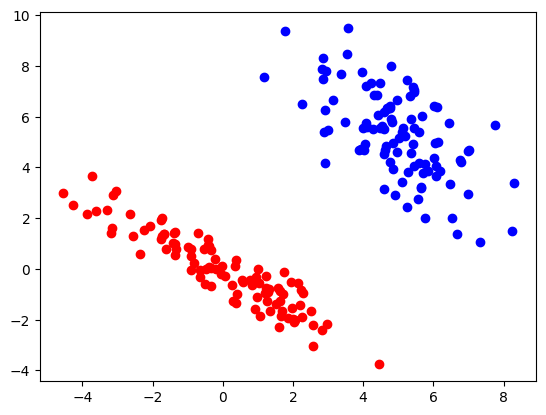

In [72]:
# plot the datasets
plt.scatter(X1[:, 0], X1[:, 1], color='red')
plt.scatter(X2[:, 0], X2[:, 1], color='blue')
plt.show()

In [27]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [73]:
# divide datasets to train and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

In [74]:
# train the perceptron model on X1_train, y1_train and X2_train, y2_train
perceptron_classifier = Perceptron()
perceptron_classifier.fit(np.concatenate([X1_train, X2_train]), np.concatenate([y1_train, y2_train]))

Perceptron()

In [75]:
perceptron_classifier.score(np.concatenate([X1_test, X2_test]), np.concatenate([y1_test, y2_test]))

1.0

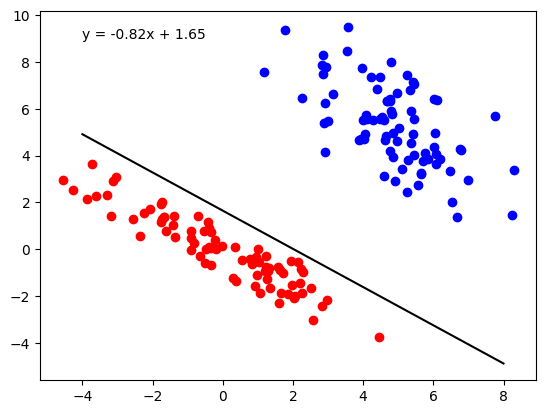

In [88]:
# plot the decision boundary
w = perceptron_classifier.coef_[0]
b = perceptron_classifier.intercept_[0]
x = np.linspace(-4, 8, 100)
y = -w[0]/w[1] * x - b/w[1]
plt.scatter(X1_train[:, 0], X1_train[:, 1], color='red')
plt.scatter(X2_train[:, 0], X2_train[:, 1], color='blue')
# write the decision boundary equation on the plot at left top corner use y = mx + c form and precision to 2 decimal places
plt.text(-4, 9, f'y = {-w[0]/w[1]:.2f}x + {-b/w[1]:.2f}', fontsize=10)

plt.plot(x, y, color='black')

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
linear_classifier = LinearRegression()
linear_classifier.fit(np.concatenate([X1_train, X2_train]), np.concatenate([y1_train, y2_train]))


LinearRegression()

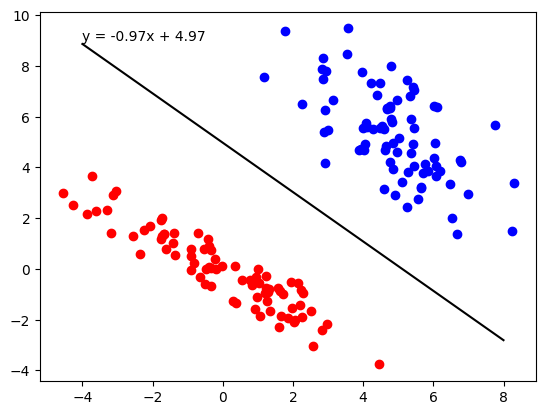

In [92]:
# plot the decision boundary
w = linear_classifier.coef_
b = linear_classifier.intercept_
x = np.linspace(-4, 8, 100)
y = -w[0]/w[1] * x - b/w[1]
plt.scatter(X1_train[:, 0], X1_train[:, 1], color='red')
plt.scatter(X2_train[:, 0], X2_train[:, 1], color='blue')
# write the decision boundary equation on the plot at left top corner use y = mx + c form and precision to 2 decimal places
plt.text(-4, 9, f'y = {-w[0]/w[1]:.2f}x + {-b/w[1]:.2f}', fontsize=10)
plt.plot(x, y, color='black')
plt.show()

In [93]:
# comparre metrics of perceptron and linear regression
from sklearn.metrics import accuracy_score

In [94]:
# perceptron
perceptron_predictions = perceptron_classifier.predict(np.concatenate([X1_test, X2_test]))
perceptron_accuracy = accuracy_score(np.concatenate([y1_test, y2_test]), perceptron_predictions)


In [95]:
# linear regression
linear_predictions = linear_classifier.predict(np.concatenate([X1_test, X2_test]))
linear_accuracy = accuracy_score(np.concatenate([y1_test, y2_test]), np.sign(linear_predictions))

In [96]:
# verify the accuracy of the models
print(perceptron_accuracy, linear_accuracy)

1.0 1.0
